## Data visualization

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed.csv", index_col=0)

# Question 1
What factors most strongly predict box office success?
- Budget
- Cast popularity
- IMDb rating

## Budget vs Worldwide Revenue

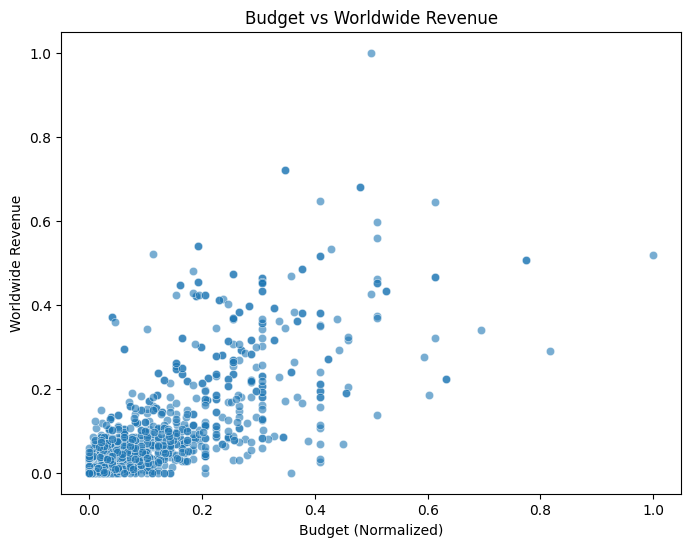

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="budget",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Budget vs Worldwide Revenue")
plt.xlabel("Budget (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()


Movies with higher budgets tend to generate higher revenue, but the wide spread indicates that budget alone does not guarantee box office success.

## IMDb Rating vs Worldwide Revenue

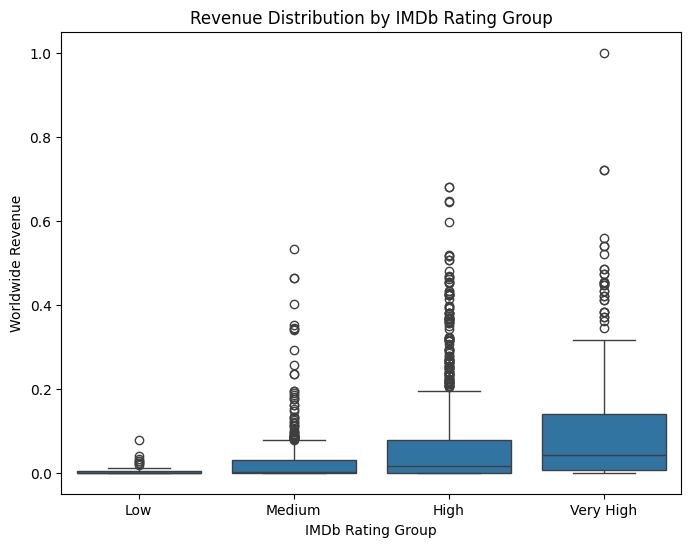

In [28]:
df["rating_bin"] = pd.cut(
    df["imdb_rating"],
    bins=[0, 0.4, 0.6, 0.8, 1.0],
    labels=["Low", "Medium", "High", "Very High"]
)

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="rating_bin",
    y="revenue_worldwide"
)

plt.title("Revenue Distribution by IMDb Rating Group")
plt.xlabel("IMDb Rating Group")
plt.ylabel("Worldwide Revenue")
plt.show()


Movies with higher IMDb ratings tend to show higher median revenue, but revenue variability remains high even among well-rated films.

## Cast Popularity vs Revenue

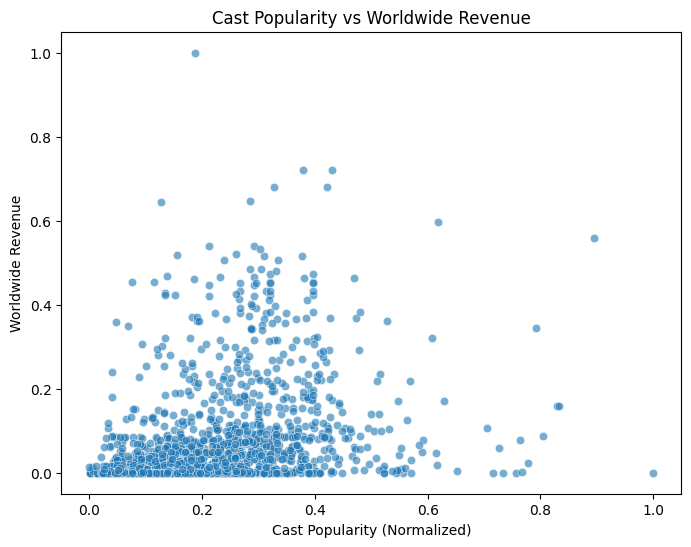

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="cast_popularity_mean",
    y="revenue_worldwide",
    alpha=0.6
)

plt.title("Cast Popularity vs Worldwide Revenue")
plt.xlabel("Cast Popularity (Normalized)")
plt.ylabel("Worldwide Revenue")
plt.show()


Cast popularity shows a positive but weak relationship with revenue compared to budget.

## Correlation Between Key Features

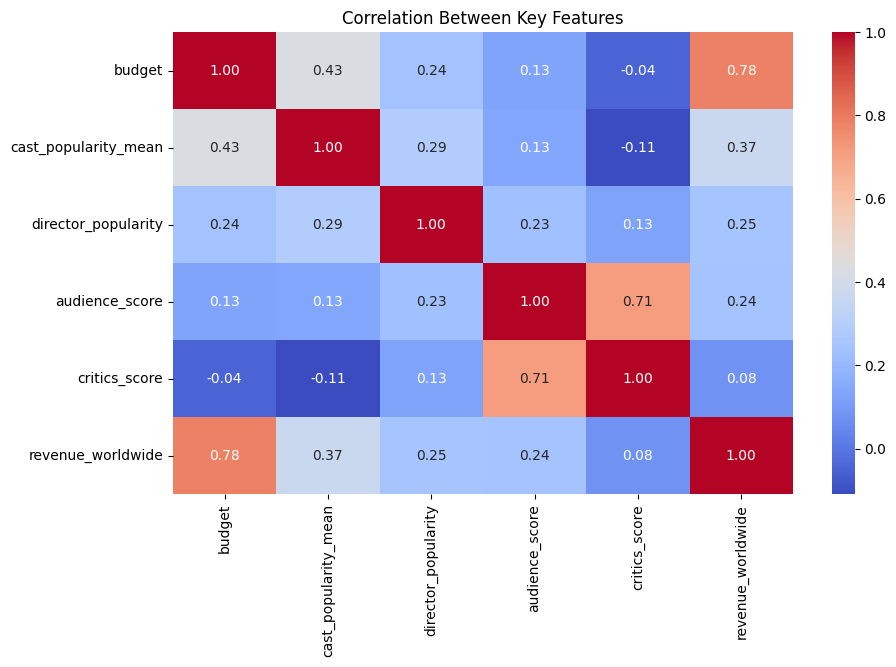

In [30]:
plt.figure(figsize=(10,6))

corr = df[[
    "budget",
    "cast_popularity_mean",
    "director_popularity",
    "audience_score",
    "critics_score",
    "revenue_worldwide"
]].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Between Key Features")
plt.show()

Budget shows the strongest correlation with worldwide revenue, making it the most important predictor of box office success.

# Question 2
Do movies released in summer perform better financially than those in winter?

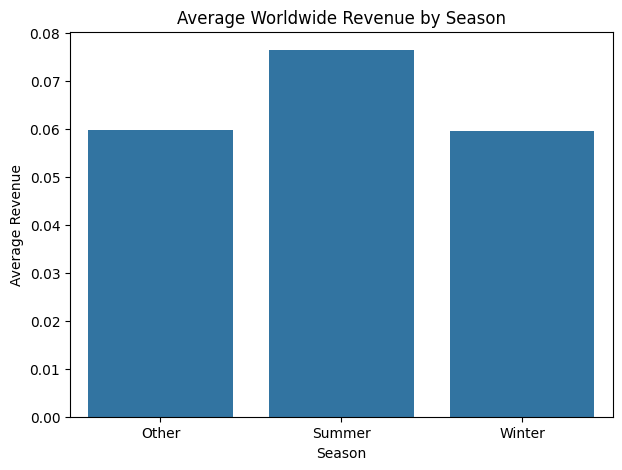

In [31]:
season_revenue = df.groupby("season")["revenue_worldwide"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(
    data=season_revenue,
    x="season",
    y="revenue_worldwide"
)

plt.title("Average Worldwide Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Average Revenue")
plt.show()

Movies released in summer tend to earn higher average revenue compared to winter and other seasons.

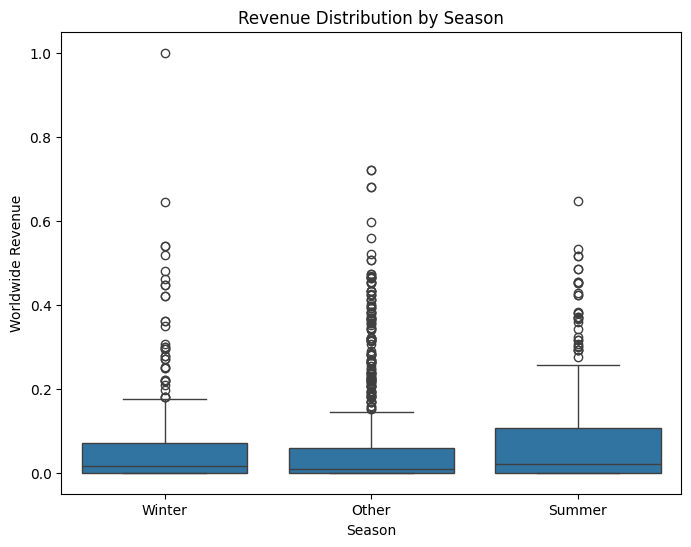

In [32]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="season",
    y="revenue_worldwide"
)

plt.title("Revenue Distribution by Season")
plt.xlabel("Season")
plt.ylabel("Worldwide Revenue")
plt.show()

Summer releases show higher medians than other seasons.

# Question 3
Is there a significant difference between critics’ and audience ratings across genres?

## Average Rating Across All Genres

In [ ]:
import ast

df["genres"] = df["genres"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

genre_df = df.explode("genres")

genre_ratings = (
    genre_df
    .groupby("genres")[["critics_score", "audience_score"]]
    .mean()
    .reset_index()
)

genre_melted = genre_ratings.melt(
    id_vars="genres",
    value_vars=["critics_score", "audience_score"],
    var_name="Rating Type",
    value_name="Score"
)


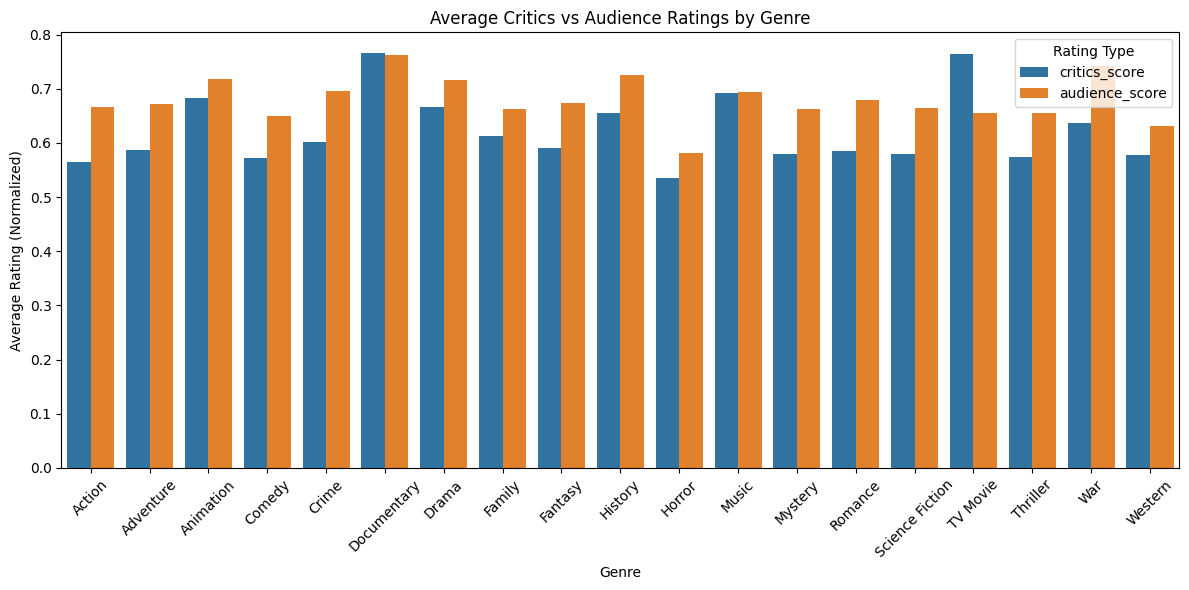

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=genre_melted,
    x="genres",
    y="Score",
    hue="Rating Type"
)

plt.title("Average Critics vs Audience Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating (Normalized)")
plt.xticks(rotation=45)
plt.legend(title="Rating Type")
plt.tight_layout()
plt.show()


Audiences generally rate genres such as Animation and Adventure higher than critics, while Documentry and Music show closer agreement between both groups.

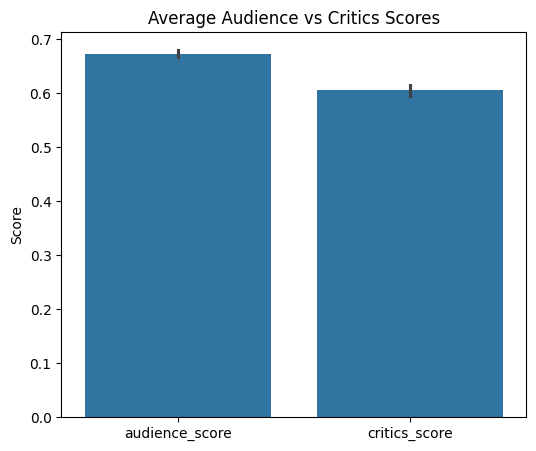

In [35]:
avg_scores = df.melt(
    value_vars=["audience_score", "critics_score"],
    var_name="Score Type",
    value_name="Score"
)

plt.figure(figsize=(6,5))
sns.barplot(
    data=avg_scores,
    x="Score Type",
    y="Score"
)

plt.title("Average Audience vs Critics Scores")
plt.ylabel("Score")
plt.xlabel("")
plt.show()


Critics tend to rate movies slightly lower on average compared to audiences.

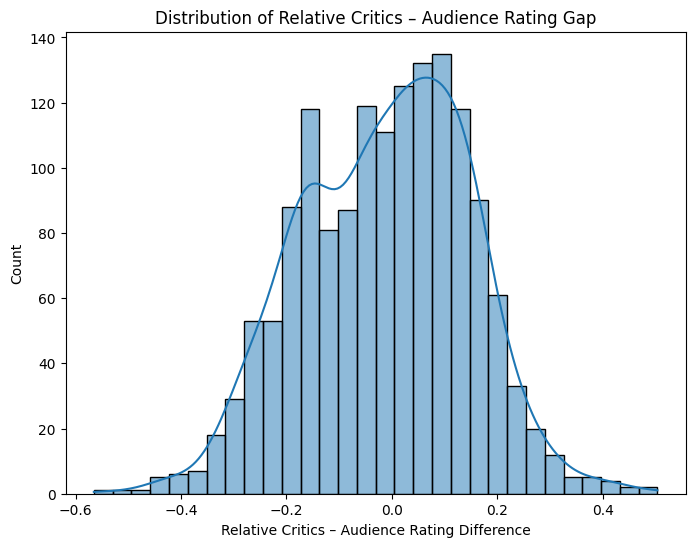

In [36]:
# Rating Gap Distribution
df["rating_gap"] = (
    (df["critics_score"] - df["critics_score"].mean()) -
    (df["audience_score"] - df["audience_score"].mean())
)


plt.figure(figsize=(8,6))
sns.histplot(df["rating_gap"], bins=30, kde=True)

plt.title("Distribution of Relative Critics – Audience Rating Gap")
plt.xlabel("Relative Critics – Audience Rating Difference")
plt.show()

Most films show close agreement between critics and audiences. However, audience-favored films are more common, while a smaller subset of titles receive higher ratings from critics.